<a href="https://colab.research.google.com/github/GodHandOne/Deeplerning_Study/blob/Chapter_4/HousePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 机器学习回归问题 预测房价

## 加载数据

In [8]:
from tensorflow.keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=(boston_housing.load_data())
print(train_data)
print(len(train_data))
print(train_targets)
print(test_data)
print(test_targets)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
404
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.

## 数据标准化
数据标准化的指标需要基于训练数据

In [2]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

## 构建模型

In [3]:
from keras.engine.training import optimizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model=keras.Sequential([
      layers.Dense(64,activation="relu"),
      layers.Dense(64,activation="relu"),
      layers.Dense(1) # 不加激活函数，模型能够学会预测任意范围的值，如果加sigmoid激活函数，模型只能预测0-1的值
  ])

# 编译模型
  model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"]) # 使用均方误差损失函数，是回归问题常用的函数；指标：平均绝对误差，预测值与目标值之差的绝对值
  return model

## 利用K折交叉验证来验证方法(K折交叉验证有助于可靠地评估模型)
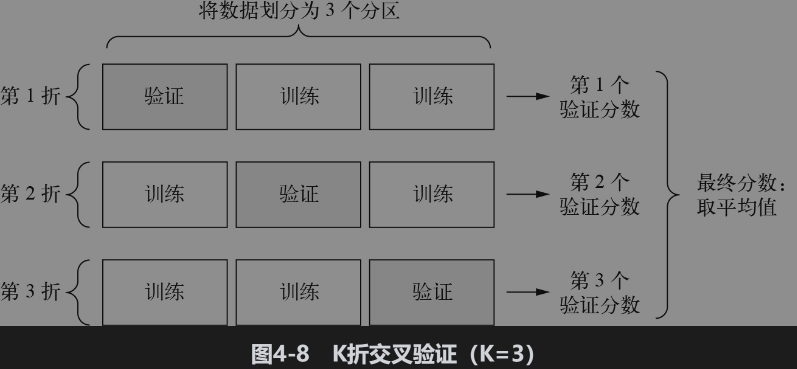

In [15]:
from keyword import kwlist
import numpy as np

k=4
num_val_samples=int(len(train_data)/k)
print(num_val_samples)
num_epochs=100
all_scores=[]

for i in range(k):
  print(f"Processing fold #{i}")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples] # 第k个分区用来验证的数据
  print(val_data)
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model=build_model() #建立keras模型
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)
  print(all_scores)
  np.mean(all_scores)

101
Processing fold #0
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [2.18700e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.93370e+02
  5.03000e+00]
 [2.98500e-02 0.00000e+00 2.18000e+00 ... 1.87000e+01 3.94120e+02
  5.21000e+00]
 [6.12900e-02 2.00000e+01 3.33000e+00 ... 1.49000e+01 3.77070e+02
  3.01000e+00]]
[3.4514248371124268]
Processing fold #1
[[5.75290e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.85910e+02
  2.47000e+00]
 [4.75470e-01 0.00000e+00 9.90000e+00 ... 1.84000e+01 3.96230e+02
  1.27300e+01]
 [1.27440e-01 0.00000e+00 6.91000e+00 ... 1.79000e+01 3.85410e+02
  4.84000e+00]
 ...
 [6.41700e-02 0.00000e+00 5.96000e+00 ... 1.92000e+01 3.96900e+02
  9.68000e+00]
 [4.46200e-02 2.50000e+01 4.86000e+00 ... 1.90000e+01 3.95630e+02
  7.22000e+00]
 [2.77974e+00 0.00000e+00 1.95800e+

## 保存每折的验证分数（修改epoch为500轮）【存在一定的问题】

In [19]:
from keyword import kwlist
import numpy as np

k=4
num_val_samples=int(len(train_data)/k)
print(num_val_samples)
num_epochs=500
all_mae_hsitories=[]

for i in range(k):
  print(f"Processing fold #{i}")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples] # 第k个分区用来验证的数据
  print(val_data)
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model=build_model() #建立keras模型
  history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=16,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)
  print(all_scores)
  np.mean(all_scores)

101
Processing fold #0
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [2.18700e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.93370e+02
  5.03000e+00]
 [2.98500e-02 0.00000e+00 2.18000e+00 ... 1.87000e+01 3.94120e+02
  5.21000e+00]
 [6.12900e-02 2.00000e+01 3.33000e+00 ... 1.49000e+01 3.77070e+02
  3.01000e+00]]
[3.4514248371124268, 5.472230911254883, 5.312963485717773, 4.641767978668213, 2.8446736335754395, 2.9857304096221924, 3.4387624263763428, 4.679076671600342, 3.284862518310547]
Processing fold #1
[[5.75290e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.85910e+02
  2.47000e+00]
 [4.75470e-01 0.00000e+00 9.90000e+00 ... 1.84000e+01 3.96230e+02
  1.27300e+01]
 [1.27440e-01 0.00000e+00 6.91000e+00 ... 1.79000e+01 3.85410e+02
  4.84000e+00]
 ...
 [6.41700e-02 0.00000e+00 5.96000e+00 ... 

KeyboardInterrupt: ignored